In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from mne.preprocessing import ICA
import mne

from util import load_subjects_list
from const import BASE_WORKDIR, MEG_FILTERED_FNAME, EVOKED_FULL_FNAME, COVARIANCE_FNAME

In [2]:
# event id map, selecting only target work eveokd responses and averaging them together
# https://www.fieldtriptoolbox.org/assets/pdf/Schoffelen_MOUS_DSC_revision_v3.pdf, table 7
EVENT_ID = dict(
    rc_plus_sentence_target=2,
    rc_plus_word_target=4,
    rc_minus_sentence_target=6,
    rc_minus_word_target=8
)
T_MIN = -0.2
T_MAX = 1
BASELINE = (None, 0)
REJECT_CRITERIA = dict(mag=10000e-15)
FLAT_CRITERIA = dict(mag=1e-15)

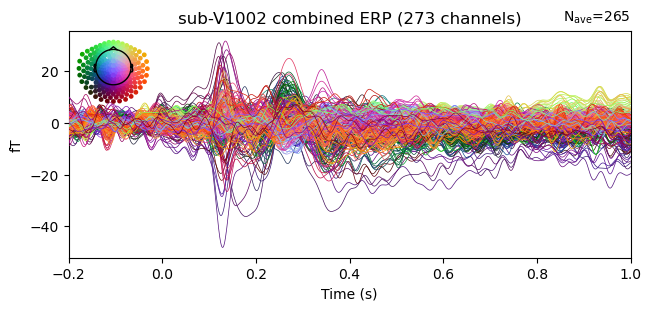

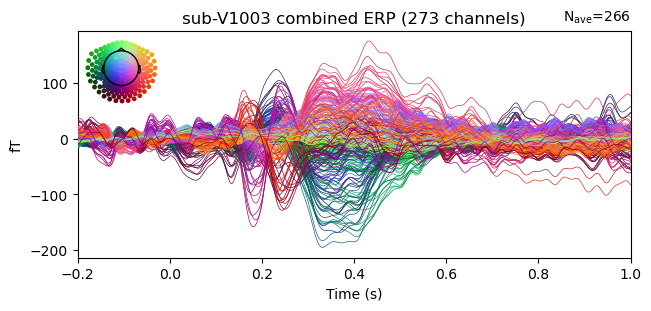

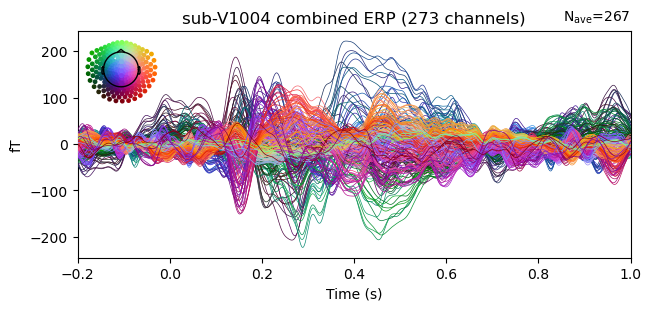

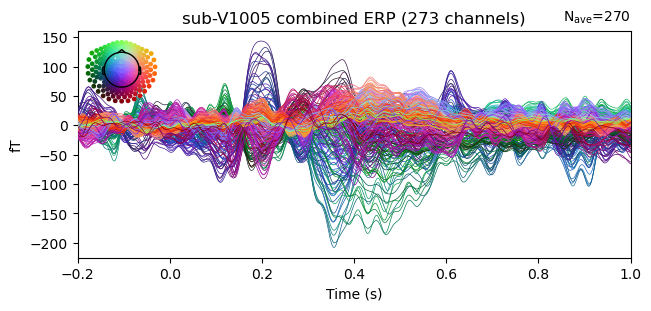

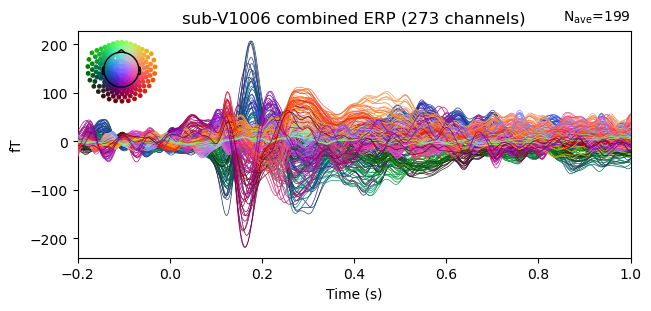

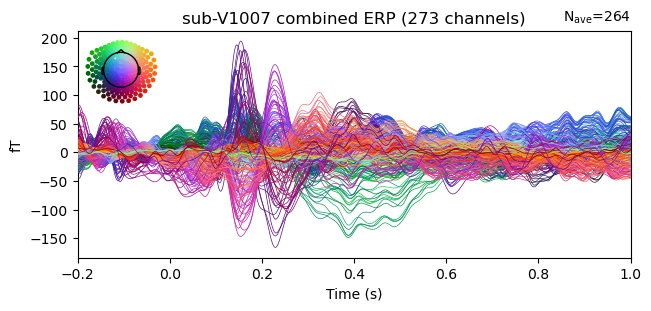

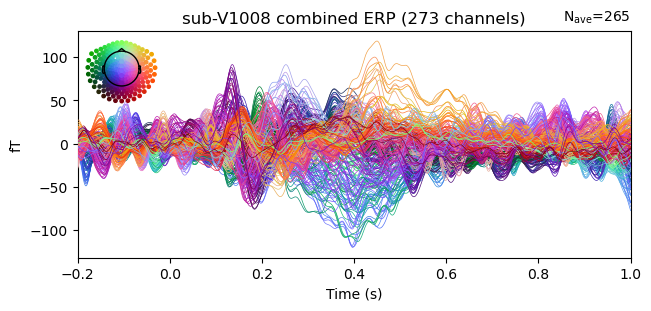

In [3]:
for subj in load_subjects_list():
    raw = mne.io.read_raw_fif(f"{BASE_WORKDIR}/{subj}/{MEG_FILTERED_FNAME}", preload=False, verbose='ERROR')
    picks = [x for x in raw.ch_names if x.startswith('M')] 
    events = mne.find_events(raw, verbose='ERROR')
    epochs = mne.Epochs(
        raw,
        events,
        EVENT_ID,
        T_MIN,
        T_MAX,
        BASELINE,
        picks=picks,
        reject_tmax=0,
        reject=REJECT_CRITERIA,
        flat=FLAT_CRITERIA,
        preload=True,
        verbose='ERROR')
    evoked = epochs.average(by_event_type=False, picks=picks)
    evoked_baseline_corrected = evoked.apply_baseline(BASELINE, verbose='ERROR')
    evoked_baseline_corrected.plot(spatial_colors=True, titles=f"{subj} combined ERP")
    evoked_baseline_corrected.save(f"{BASE_WORKDIR}/{subj}/{EVOKED_FULL_FNAME}", overwrite=True, verbose='ERROR')
    cov = mne.compute_covariance(epochs, verbose='ERROR')
    cov.save(f"{BASE_WORKDIR}/{subj}/{COVARIANCE_FNAME}", overwrite=True, verbose='ERROR')
    del raw
    del epochs
    del evoked
    del cov